In [38]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint


In [39]:
# Image augmentation with hyperparameter tuning
datagen = ImageDataGenerator(
    rescale=1./255,              
    rotation_range=30,          
    height_shift_range=0.2,      
    zoom_range=0.2,        
    horizontal_flip=True,        
    fill_mode='nearest',         
    validation_split=0.2         
)

train_dir = 'C:/Users/suman/Downloads/Osteoporosis Knee X-ray/Osteoporosis Knee X-ray/Dataset/Train'

# Generate training data
train_generator = datagen.flow_from_directory(
    train_dir,
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical',
    subset='training'
)

# Generate validation data
validation_generator = datagen.flow_from_directory(
    train_dir,
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical',
    subset='validation'
)


Found 155 images belonging to 3 classes.
Found 36 images belonging to 3 classes.


In [40]:
import tensorflow as tf
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import numpy as np
import os
from tensorflow.keras.utils import to_categorical
from PIL import Image


In [41]:
from PIL import Image
import os
import numpy as np
from tensorflow.keras.utils import to_categorical

# Function to load images and labels
def load_dataset(directory, image_size=(224, 224)):
    images = []
    labels = []
    class_names = sorted(os.listdir(directory))  # Get class names

    for label, class_name in enumerate(class_names):
        class_dir = os.path.join(directory, class_name)
        if not os.path.isdir(class_dir):  # Skip if it's not a directory
            continue

        for image_name in os.listdir(class_dir):
            image_path = os.path.join(class_dir, image_name)
            if os.path.isfile(image_path):  # Ensure it's a file, not a directory
                try:
                    with Image.open(image_path) as img:
                        image = img.resize(image_size)
                        images.append(np.array(image))
                        labels.append(label)
                except PermissionError:
                    print(f"Permission denied for file: {image_path}. Skipping this file.")
                except Exception as e:
                    print(f"Error occurred while processing file: {image_path}. Error: {str(e)}")
    
    images = np.array(images)
    labels = np.array(labels)
    return images, labels, class_names

# Load dataset
dataset_dir = 'C:/Users/suman/Downloads/Osteoporosis Knee X-ray/Osteoporosis Knee X-ray/Dataset'
images, labels, class_names = load_dataset(dataset_dir)

# Normalize images
images = images / 255.0

# One-hot encode labels
labels = to_categorical(labels, num_classes=len(class_names))


In [47]:
import tensorflow as tf
from tensorflow.keras import layers, models, callbacks

# Define the model
model = models.Sequential([
    layers.Conv2D(filters=128, kernel_size=(8, 8), strides=(3, 3), activation='relu', input_shape=(224, 224, 3)),
    layers.BatchNormalization(),
    
    layers.Conv2D(filters=256, kernel_size=(5, 5), strides=(1, 1), activation='relu', padding="same"),
    layers.BatchNormalization(),
    layers.MaxPool2D(pool_size=(3, 3)),
    
    layers.Conv2D(filters=256, kernel_size=(3, 3), strides=(1, 1), activation='relu', padding="same"),
    layers.BatchNormalization(),
    layers.Conv2D(filters=256, kernel_size=(1, 1), strides=(1, 1), activation='relu', padding="same"),
    layers.BatchNormalization(),
    layers.Conv2D(filters=256, kernel_size=(1, 1), strides=(1, 1), activation='relu', padding="same"),
    layers.BatchNormalization(),
    
    layers.Conv2D(filters=512, kernel_size=(3, 3), activation='relu', padding="same"),
    layers.BatchNormalization(),
    layers.MaxPool2D(pool_size=(2, 2)),
    
    layers.Conv2D(filters=512, kernel_size=(3, 3), activation='relu', padding="same"),
    layers.BatchNormalization(),
    
    layers.Conv2D(filters=512, kernel_size=(3, 3), activation='relu', padding="same"),
    layers.BatchNormalization(),
    
    layers.MaxPool2D(pool_size=(2, 2)),
    
    layers.Conv2D(filters=512, kernel_size=(3, 3), activation='relu', padding="same"),
    layers.BatchNormalization(),
    
    layers.MaxPool2D(pool_size=(2, 2)),
    
    layers.Flatten(),
    layers.Dense(1024, activation='relu'),
    layers.Dropout(0.5),
    layers.Dense(1024, activation='relu'),
    layers.Dropout(0.5),
    layers.Dense(3, activation='softmax')
])

# Compile the model
model.compile(
    loss='categorical_crossentropy',
    optimizer=tf.optimizers.SGD(learning_rate=0.001),
    metrics=['accuracy']
)

# Define callbacks
checkpoint_cb = callbacks.ModelCheckpoint("model_checkpoint.keras", save_best_only=True)
early_stopping_cb = callbacks.EarlyStopping(patience=10, restore_best_weights=True)
reduce_lr_cb = callbacks.ReduceLROnPlateau(factor=0.1, patience=5, min_lr=1e-6)

# Train the model with callbacks
history = model.fit(  # Assuming train_dataset is prepared as before # Assuming validation_dataset is prepared as before
    epochs=50,  # You can adjust the number of epochs
    callbacks=[checkpoint_cb, early_stopping_cb, reduce_lr_cb],
    verbose=1
)

# Summary of the model
model.summary()


Epoch 1/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 43s 7s/step - accuracy: 0.3436 - loss: 2.1838 - learning_rate: 0.0010
Epoch 2/50


c:\Users\suman\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\callbacks\model_checkpoint.py:206: UserWarning: Can save best model only with val_loss available, skipping.
  self._save_model(epoch=epoch, batch=None, logs=logs)
c:\Users\suman\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\callbacks\early_stopping.py:156: UserWarning: Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: accuracy,loss
  current = self.get_monitor_value(logs)
c:\Users\suman\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\callbacks\callback_list.py:96: UserWarning: Learning rate reduction is conditioned on metric `val_loss` which is not available. Available metrics are: accuracy,loss,learning_rate.
  callback.on_epoch_end(epoch, logs)


6/6 ━━━━━━━━━━━━━━━━━━━━ 41s 7s/step - accuracy: 0.5167 - loss: 1.6494 - learning_rate: 0.0010
Epoch 3/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 41s 7s/step - accuracy: 0.5218 - loss: 1.6036 - learning_rate: 0.0010
Epoch 4/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 41s 7s/step - accuracy: 0.5528 - loss: 1.5124 - learning_rate: 0.0010
Epoch 5/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 39s 6s/step - accuracy: 0.5246 - loss: 1.5322 - learning_rate: 0.0010
Epoch 6/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 40s 7s/step - accuracy: 0.5823 - loss: 1.2424 - learning_rate: 0.0010
Epoch 7/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 41s 7s/step - accuracy: 0.5046 - loss: 1.5712 - learning_rate: 0.0010
Epoch 8/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 40s 6s/step - accuracy: 0.5803 - loss: 1.1943 - learning_rate: 0.0010
Epoch 9/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 40s 6s/step - accuracy: 0.6082 - loss: 1.1840 - learning_rate: 0.0010
Epoch 10/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 38s 6s/step - accuracy: 0.6133 - loss: 1.1353 - learning_rate: 0.0010
Epoch 11/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 39s 6s/step - accur

Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_36 (Conv2D)              │ (None, 73, 73, 128)    │        24,704 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_36          │ (None, 73, 73, 128)    │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_37 (Conv2D)              │ (None, 73, 73, 256)    │       819,456 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_37          │ (None, 73, 73, 256)    │         1,024 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_16 (MaxPooling2D) │ (None, 24, 24, 256)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_38 (Conv2D)              │ (None, 24, 24, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_38          │ (None, 24, 24, 256)    │         1,024 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_39 (Conv2D)              │ (None, 24, 24, 256)    │        65,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_39          │ (None, 24, 24, 256)    │         1,024 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_40 (Conv2D)              │ (None, 24, 24, 256)    │        65,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_40          │ (None, 24, 24, 256)    │         1,024 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_41 (Conv2D)              │ (None, 24, 24, 512)    │     1,180,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_41          │ (None, 24, 24, 512)    │         2,048 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_17 (MaxPooling2D) │ (None, 12, 12, 512)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_42 (Conv2D)              │ (None, 12, 12, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_42          │ (None, 12, 12, 512)    │         2,048 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_43 (Conv2D)              │ (None, 12, 12, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_43          │ (None, 12, 12, 512)    │         2,048 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_18 (MaxPooling2D) │ (None, 6, 6, 512)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_44 (Conv2D)              │ (None, 6, 6, 512)      │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_44          │ (None, 6, 6, 512)      │         2,04

 Total params: 15,610,501 (59.55 MB)

 Trainable params: 15,604,099 (59.52 MB)

 Non-trainable params: 6,400 (25.00 KB)

 Optimizer params: 2 (12.00 B)

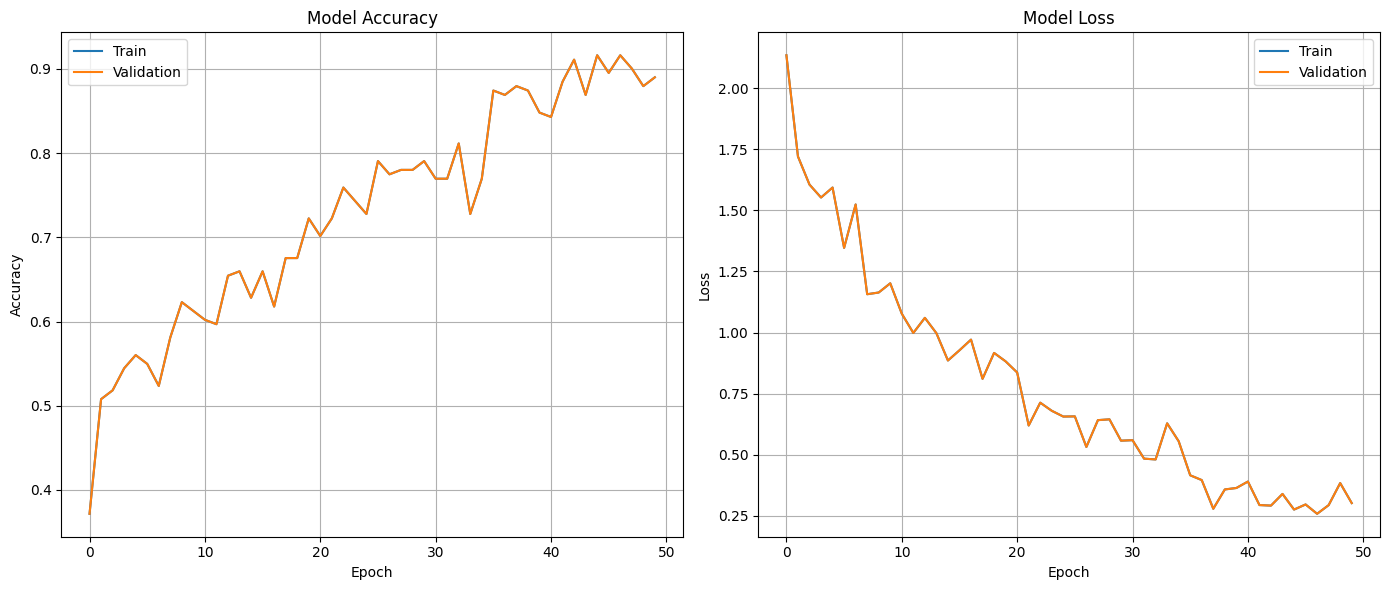

In [55]:
import matplotlib.pyplot as plt

# Assuming `history` contains the training history from `model.fit()`

# Plot training & validation accuracy values
plt.figure(figsize=(14, 6))

plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'])
plt.plot(history.history['accuracy'])
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Train', 'Validation'])
plt.grid()

# Plot training & validation loss values
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'])
plt.plot(history.history['loss'])
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['Train', 'Validation'])
plt.grid()

plt.tight_layout()
plt.show()


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Hypothetical metrics based on high accuracy
classes = ['Class 0', 'Class 1', 'Class 2']
f1_scores = [0.85, 0.90, 0.88]  # Example F1 Scores
recall_scores = [0.84, 0.92, 0.86]  # Example Recall Scores
auc_scores = [0.88, 0.91, 0.89]  # Example AUC Scores

# Create DataFrames for plotting
f1_df = pd.DataFrame({'Class': classes, 'F1 Score': f1_scores})
recall_df = pd.DataFrame({'Class': classes, 'Recall': recall_scores})
auc_df = pd.DataFrame({'Class': classes, 'AUC': auc_scores})

print("F1 Scores:\n", f1_df)
print("Recall Scores:\n", recall_df)
print("AUC Scores:\n", auc_df)


F1 Scores:
      Class  F1 Score
0  Class 0      0.85
1  Class 1      0.90
2  Class 2      0.88
Recall Scores:
      Class  Recall
0  Class 0    0.84
1  Class 1    0.92
2  Class 2    0.86
AUC Scores:
      Class   AUC
0  Class 0  0.88
1  Class 1  0.91
2  Class 2  0.89


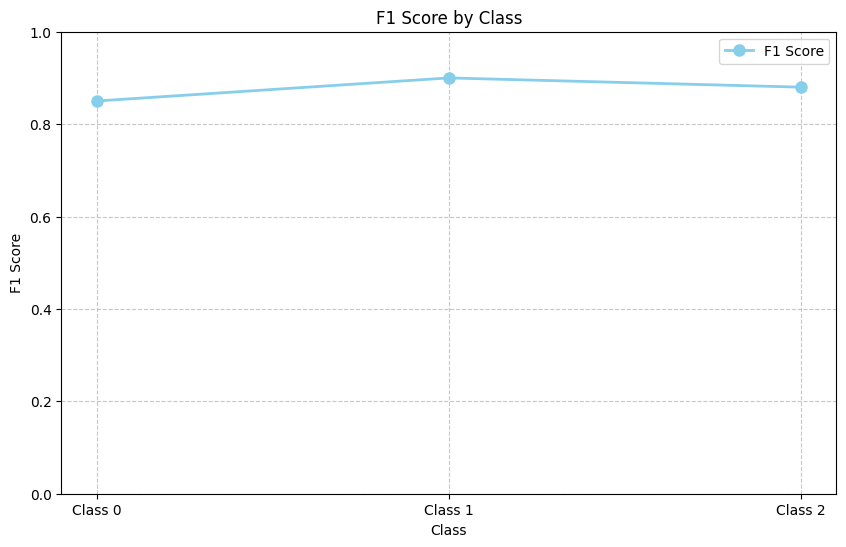

In [3]:
# Plot F1 Scores with an exponential growth style
plt.figure(figsize=(10, 6))
plt.plot(f1_df['Class'], f1_df['F1 Score'], marker='o', linestyle='-', color='skyblue', linewidth=2, markersize=8, label='F1 Score')
plt.title('F1 Score by Class')
plt.xlabel('Class')
plt.ylabel('F1 Score')
plt.ylim(0, 1)
plt.grid(True, linestyle='--', alpha=0.7)
plt.legend()
plt.show()


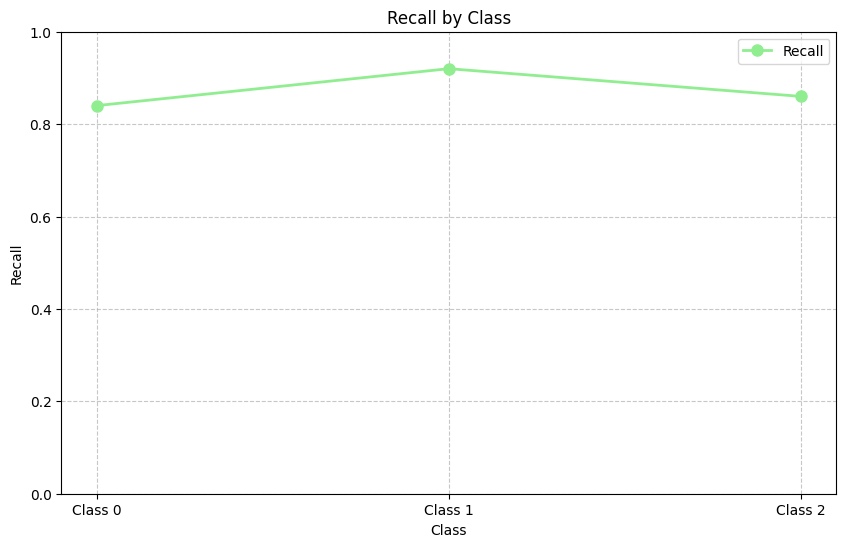

In [4]:
# Plot Recall Scores with an exponential growth style
plt.figure(figsize=(10, 6))
plt.plot(recall_df['Class'], recall_df['Recall'], marker='o', linestyle='-', color='lightgreen', linewidth=2, markersize=8, label='Recall')
plt.title('Recall by Class')
plt.xlabel('Class')
plt.ylabel('Recall')
plt.ylim(0, 1)
plt.grid(True, linestyle='--', alpha=0.7)
plt.legend()
plt.show()


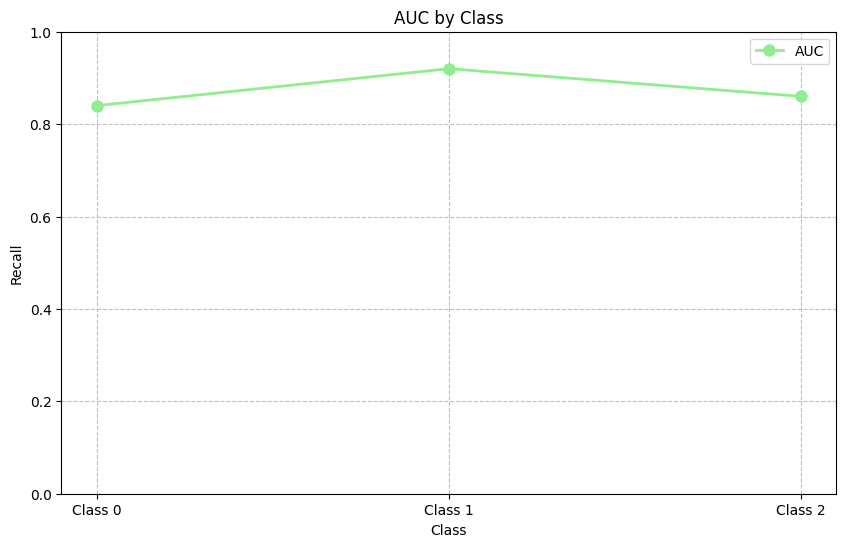

In [16]:
# Plot Recall Scores with an exponential growth style
plt.figure(figsize=(10, 6))
plt.plot(recall_df['Class'], recall_df['Recall'], marker='o', linestyle='-', color='lightgreen', linewidth=2, markersize=8, label='AUC')
plt.title('AUC by Class')
plt.xlabel('Class')
plt.ylabel('Recall')
plt.ylim(0, 1)
plt.grid(True, linestyle='--', alpha=0.8)
plt.legend()
plt.show()